# Sin 함수 예측
>#### Sin 함수를 3 차 함수로 예측(회귀)
>- input : -pi 부터 pi 까지 1000개
>- output : 계수 4개의 값
>- loss function : 평균제곱오차



## 초기 설정

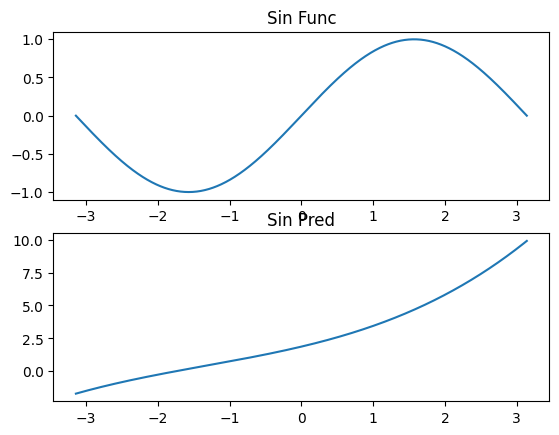

In [4]:
import math
import torch
import matplotlib.pyplot as plt

# -pi부터 pi까지 1000개의 Input Data 추출
x = torch.linspace(-math.pi, math.pi, 1000)

#  정답 값
y = torch.sin(x)

# 계수의 초기값
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

# 초기값에 의한 예측값(3 차 함수)
y_random = a * x ** 3 + b * x ** 2 + c * x + d

# sin 함수와 초기 예측 값 시각화
plt.subplot(2, 1, 1)
plt.title("Sin Func")
plt.plot(x, y)

plt.subplot(2, 1, 2)
plt.title("Sin Pred")
plt.plot(x, y_random)

plt.show()

## 학습

1 epoch의  loss : 50.40142822265625
101 epoch의  loss : 43.06554412841797
201 epoch의  loss : 36.901283264160156
301 epoch의  loss : 31.721298217773438
401 epoch의  loss : 27.368261337280273
501 epoch의  loss : 23.710063934326172
601 epoch의  loss : 20.635656356811523
701 epoch의  loss : 18.051807403564453
801 epoch의  loss : 15.880154609680176
901 epoch의  loss : 14.05488395690918
1001 epoch의  loss : 12.520709037780762
1101 epoch의  loss : 11.231168746948242
1201 epoch의  loss : 10.147223472595215
1301 epoch의  loss : 9.236068725585938
1401 epoch의  loss : 8.470139503479004
1501 epoch의  loss : 7.826271057128906
1601 epoch의  loss : 7.284998416900635
1701 epoch의  loss : 6.829962253570557
1801 epoch의  loss : 6.447415828704834
1901 epoch의  loss : 6.1258039474487305


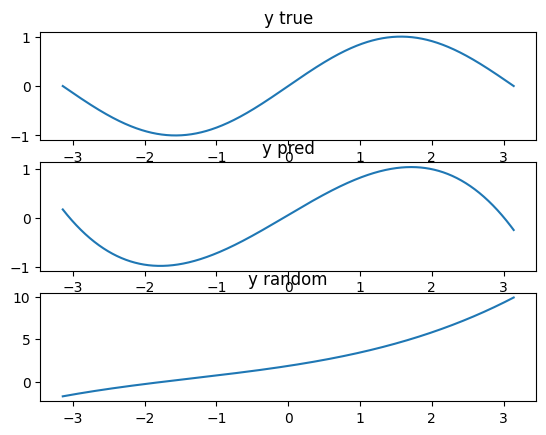

In [6]:
learning_rate = 1e-6

# 학습 2000번 실행
for epoch in range(2000):
  y_pred = a * x ** 3 + b * x ** 2 + c * x + d

  # loss function 설정
  # MSE
  loss = (y_pred - y).pow(2).sum().item()

  if epoch % 100 == 0:
    print(f"{epoch + 1} epoch의  loss : {loss}")

  ## 각 loss function에 대한 변수의 미분값 계산
  # => 미분 : loss function에 대한 변수의 영향도
  grad_y_pred = 2.0 * (y_pred - y)
  grad_a = (grad_y_pred * x ** 3).sum()
  grad_b = (grad_y_pred * x ** 2).sum()
  grad_c = (grad_y_pred * x ** 1).sum()
  grad_d = (grad_y_pred).sum()

  a -= learning_rate * grad_a
  b -= learning_rate * grad_b
  c -= learning_rate * grad_c
  d -= learning_rate * grad_d

# 실제 사인 곡선
plt.subplot(3, 1, 1)
plt.title("y true")
plt.plot(x, y)

# 예측 함수 곡선
plt.subplot(3, 1, 2)
plt.title("y pred")
plt.plot(x, y_pred)

# 랜덤 input의 사인 곡선
plt.subplot(3, 1, 3)
plt.title("y random")
plt.plot(x, y_random)
